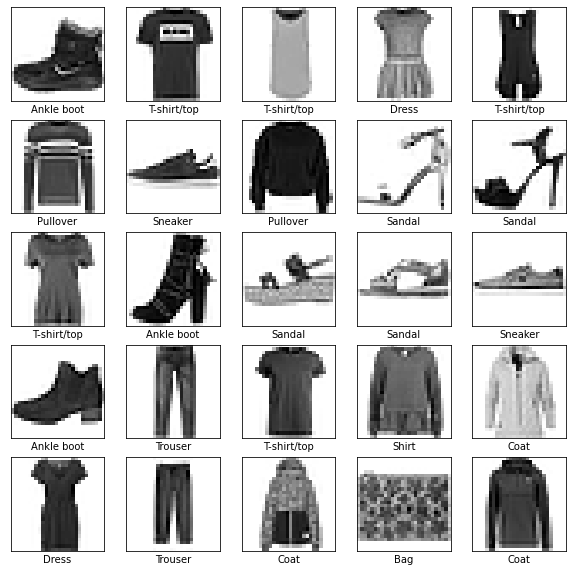

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 3ms/step - loss: 0.5638 - accuracy: 0.8046
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8573
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8720
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3363

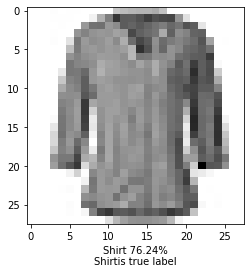

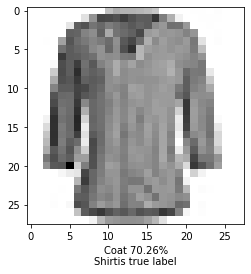

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

def show_image_grids(train_images, train_labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

if __name__ == '__main__':
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    
    
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    show_image_grids(train_images, train_labels) 
    
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.summary()
    model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
    
    checkpoint_path = "ckpt_fashion/cp-{epoch:04d}.ckpt"
    
    tb_callback = TensorBoard(log_dir='log_fashion')
    cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True,verbose=1, period=5 )
    
    # Steps 9, 10
    model.fit(train_images, train_labels, epochs=20,batch_size=128, callbacks =[cp_callback, tb_callback])
    model.load_weights('ckpt_fashion\cp-0020.ckpt')
    model.save('my_model.h5')
    loss, acc = model.evaluate(test_images, test_labels)
    prob = model.predict(test_images)
    import numpy as np
    count=0
    for i in range(10000):
        if (test_labels[i]==np.argmax(prob[i,:])): #argmax為該矩陣最大值所在的索引
            count+=1
    print("準確率為0."+str(count))
    prob=model.predict(test_images[4:5])


    label1=np.argmax(prob)
    value=(prob[0][label1])
    value=round(100*value,2)

    prob2=model.predict(np.fliplr(test_images[4:5]))
    label2=np.argmax(prob2)
    value2=prob2[0][label2]

    value2=round(value2*100,2)

    plt.imshow(test_images[4],cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(class_names[label1]+" "+str(value)+'%'+'\n'+str(class_names[test_labels[4]])+'is true label')

    plt.show()
    plt.imshow((np.fliplr(test_images[4])),cmap=plt.cm.binary)
    plt.xlabel(class_names[label2]+' '+str(value2)+'%'+'\n'+str(class_names[test_labels[4]])+'is true label')
    plt.show()

In [ ]:
history = model.fit(train_images, train_labels,  epochs=500, batch_size=32, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


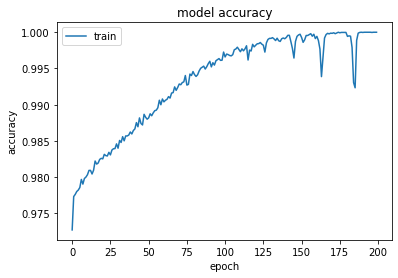

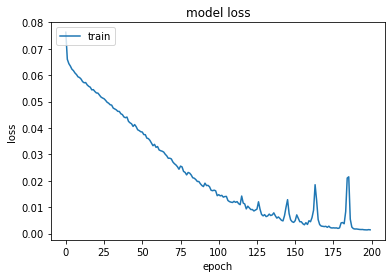

In [17]:
model.load_weights('ckpt_fashion\cp-0005.ckpt')
history = model.fit(train_images, train_labels,  epochs=200, batch_size=512, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
大概訓練到300次時已經收斂
batch_size設的大一些，收斂得塊，也就是需要訓練的次數少，訓練時間變快，準確率上升的也很穩定，但是不一定比較準確。

如果labels是one-hot編碼則用categorical_crossentropy
如果label是數字編碼，則用sparse_categorical_crossentropy